In [1]:
#  Подключаю необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os
os.chdir("/home/vladimir/jupyter/pyDA/Lab_01")


In [3]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [4]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'].value_counts(normalize=True)
#несбалансированная выборка

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [6]:
#объединим
df['quality'] = df['quality'].replace(to_replace=3, value=4).replace(8, 7).replace(4, 5)


In [7]:
df['quality'].value_counts(normalize=True)
#уже лучше

5    0.465291
6    0.398999
7    0.135710
Name: quality, dtype: float64

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 11].values  

#  разделяю на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)  


#  XGBoost

In [9]:
# conda install py-xgboost
# conda install -c anaconda py-xgboost  -- появилась Teano
from xgboost import XGBClassifier

# from sklearn.metrics import classification_report

from sklearn import metrics

In [10]:
model = XGBClassifier(seed=42,
                      n_estimators=100,
                      max_depth=6,
                      learning_rate=0.3)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print (metrics.classification_report(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print (metrics.classification_report(y_test, y_pred_test))


/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       596
           6       1.00      1.00      1.00       507
           7       1.00      1.00      1.00       176

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

              precision    recall  f1-score   support

           5       0.82      0.83      0.83       148
           6       0.73      0.70      0.72       131
           7       0.64      0.68      0.66        41

    accuracy                           0.76       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.76      0.76      0

In [42]:
model = XGBClassifier(seed=42,
                      n_estimators=1000,
                      max_depth=3,
                      learning_rate=0.05)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print (metrics.classification_report(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print (metrics.classification_report(y_test, y_pred_test))

/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           5       0.98      0.98      0.98       596
           6       0.98      0.98      0.98       507
           7       1.00      1.00      1.00       176

    accuracy                           0.98      1279
   macro avg       0.99      0.99      0.99      1279
weighted avg       0.98      0.98      0.98      1279

              precision    recall  f1-score   support

           5       0.81      0.81      0.81       148
           6       0.68      0.67      0.68       131
           7       0.57      0.59      0.58        41

    accuracy                           0.73       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.72      0.72      0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

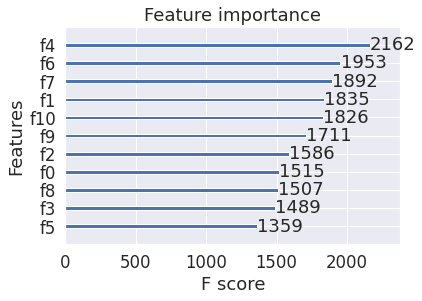

In [34]:
import xgboost as xgb
import seaborn as sns
sns.set(font_scale = 1.5)
xgb.plot_importance(model, max_num_features = 12)

In [178]:
from sklearn.model_selection import GridSearchCV

grid_param = {  
      'n_estimators': [300, 500, 800],
      'max_depth': [3, 4, 6],
      'learning_rate': [0.01,0.05, 0.1]
 }

In [119]:
grid_search_res = GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, seed=42, eval_metric='merror',
       objective='binary:logistic',                         
       colsample_bylevel=1, colsample_bytree=0.8, subsample=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, 
       min_child_weight=1, nthread=1,
       reg_alpha=0, reg_lambda=1), n_jobs=1,
       param_grid=grid_param,
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


In [120]:
grid_search_res.fit(X_train, y_train)

/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: Use

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=None,
                                     colsample_bytree=0.8, eval_metric='merror',
                                     gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, seed=42,
                            

In [123]:
grid_search_res.best_score_

0.6942616421568627

In [124]:
grid_search_res.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

In [129]:
# Строим предсказание модели
y_pred_train = grid_search_res.predict(X_train)
y_pred_test = grid_search_res.predict(X_test)

In [130]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=grid_search_res.classes_, columns=grid_search_res.classes_)
conf_mat

,5,6,7
5,126,21,1
6,25,92,14
7,2,14,25


In [131]:
conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=grid_search_res.classes_, columns=grid_search_res.classes_)
conf_mat

,5,6,7
5,592,4,0
6,2,505,0
7,1,1,174


In [177]:
#Строим предсказание модели
y_pred_train2 = grid_search_res.predict_proba(X_train)
y_pred_test2 = grid_search_res.predict_proba(X_test)
part = sum(np.sum(y_pred_test2>0.8, axis =1))/np.shape(y_pred_test2)[0]*100
print('Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна',part,'%')

Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна 39.375 %


In [173]:
print("Accuracy on train set is ", metrics.accuracy_score(y_train, y_pred_train)*100)
print("Accuracy on test set is ", metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy on train set is  99.37451133698202
Accuracy on test set is  75.9375


In [174]:
y_pred_train2 = grid_search_res.predict(X_train)
y_pred_test2 = grid_search_res.predict(X_test)
print(metrics.classification_report(y_pred_test2, y_test))

              precision    recall  f1-score   support

           5       0.85      0.82      0.84       153
           6       0.70      0.72      0.71       127
           7       0.61      0.62      0.62        40

    accuracy                           0.76       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.76      0.76      0.76       320



In [175]:
best_CV_score = grid_search_res.best_estimator_
test_acc = best_CV_score.score(X_test,y_test)
# начение критерия качества для лучших значений гиперпараметров 
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.759375


## Калибровка


In [179]:
from sklearn.calibration import CalibratedClassifierCV

In [180]:
model_sigmoid = CalibratedClassifierCV(grid_search_res, cv=2, method='sigmoid')

In [181]:
model_sigmoid.fit(X_train, y_train)

/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/vladimir/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: Use

CalibratedClassifierCV(base_estimator=GridSearchCV(cv=5, error_score='raise',
                                                   estimator=XGBClassifier(base_score=0.5,
                                                                           booster=None,
                                                                           colsample_bylevel=1,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=0.8,
                                                                           eval_metric='merror',
                                                                           gamma=0,
                                                                           gpu_id=None,
                                                                           importance_type='gain',
                                                                           interact

In [184]:
y_pred_train3 = model_sigmoid.predict(X_train)
y_pred_test3 = model_sigmoid.predict(X_test)
print(metrics.classification_report(y_pred_test3, y_test))

              precision    recall  f1-score   support

           5       0.82      0.75      0.79       162
           6       0.58      0.63      0.61       120
           7       0.51      0.55      0.53        38

    accuracy                           0.68       320
   macro avg       0.64      0.65      0.64       320
weighted avg       0.70      0.68      0.69       320

